In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from Algorithms import AdaBoost, SVM, NonlinearSVM, Logistic, Cascade, sampling
from utils import cllassification_report, plot_matrix, confusion_matrix, plot_roc_curve, accuracy

titanic_data = pd.read_csv('train.csv')

## Preprocessing


In [2]:
label_encoder = LabelEncoder()

titanic_data.fillna(titanic_data.median(numeric_only=True), inplace=True)

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(
    titanic_data['Embarked'])
titanic_data['Pclass'] = label_encoder.fit_transform(titanic_data['Pclass'])


X = titanic_data.drop(
    columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y = titanic_data['Survived']

## Scaling Dataset


In [3]:
X_selected = titanic_data[['Pclass', 'Sex', 'Parch', 'Embarked', 'SibSp']]

In [4]:
X_sampled, y_sampled = sampling(X, y)

In [5]:
scaler = StandardScaler()
scaler.fit(X_sampled)
X_sampled = scaler.transform(X_sampled)
y_sampled = y_sampled.to_numpy()

## Splitting Dataset to Train and Test


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [7]:
cascade = Cascade([NonlinearSVM(), AdaBoost(), SVM(), Logistic()])

scores = cascade.fit(X_train, y_train, X_test, y_test)

print(f"Accuracies: {scores}")
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Accuracies: [0.72067039 0.70949721 0.76536313 0.77094972]
Mean Accuracy: 0.7416201117318435
Standard Deviation: 0.026901341179131608


In [8]:
y_pred = cascade.predict(X_test)
print(cllassification_report(y_test, y_pred))

Label      Precision    Recall  F1-score   Support
--------------------------------------------------
0               0.76      0.76      0.76        94
1               0.78      0.78      0.78        85
--------------------------------------------------
Accuracy                                      0.77
Support                                        179



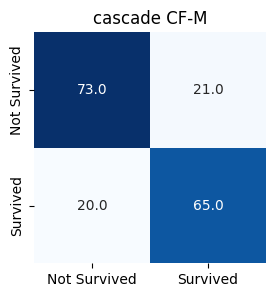

In [9]:
cf = confusion_matrix(y_test, y_pred)

plot_matrix(cf, 'cascade')

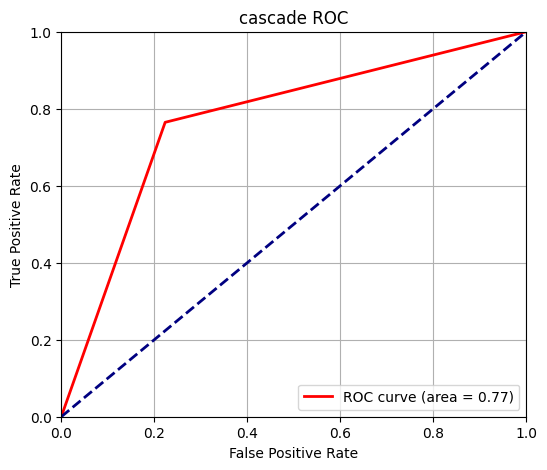

In [10]:
plot_roc_curve(y_test, y_pred, 'cascade')